<a href="https://colab.research.google.com/github/Liljekonvalj/bitbot-xl-test/blob/master/MarketBasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uppgift
Vi ska analysera vilka livsmedel kunderna köper och vilka köps tillsammans?

Datasetet återfinns på sidan [Groceries dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/data)

Here is all the data you need:
"Groceries_dataset.csv"

Ladda ner filen "Groceries_dataset.csv" och ladda upp den till "sessionens lagringsutrymme" (programkörningens lagringsutrymme) till vänster (klicka på mapp-ikonen och sedan figuren "papper med pil" Papper med pil.png)


## Dataladdning

##Ta in data från filen "Groceries_dataset.csv" och ladda dem i den "pandas DataFrame" så de kan bearbetas.



**Resonemang**:
Ladda livsmedelsdata och visa de första 5 raderna.



In [ ]:
import pandas as pd

try:
    df_groceries = pd.read_csv('/content/Groceries_dataset.csv')
    display(df_groceries.head())
except FileNotFoundError:
    print("Error: 'Groceries_dataset.csv' not found. Please ensure the file exists in the current directory.")
    df_groceries = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_groceries = None

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Data exploration

### Subtask:
Explore the loaded grocery data to understand its structure, identify key columns, and check for data quality issues.

(Här ska modellen förstå datastrukturen, identifiera nyckelkolumner och se vilka datakvalitetsproblem som eventuellt finns.)


**Reasoning**:
Explore the DataFrame's shape, inspect column names and data types, check for missing values, explore unique items, summarize basic statistics, and visualize item frequencies.



(Körningen ska helt enkelt visa vad kolumnerna innehåller - namn och antal värden, vilka datatyper det finns, om några värden saknas och visualisera data i ett diagram. En grundläggande statistik med max- och minvärden, medelvärde, kvadranter anges för varje kolumns värden om det är möjligt.)

DataFrame shape: (38765, 3)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB

Missing values per column:
Member_number      0
Date               0
itemDescription    0
dtype: int64

Number of unique items: 167

Summary statistics for 'Date' and 'Member_number':
        Member_number        Date itemDescription
count    38765.000000       38765           38765
unique            NaN         728             167
top               NaN  21-01-2015      whole milk
freq              NaN          96            2502
mean      3003.641868         NaN             NaN
std       1153.611031         NaN             NaN
min       1000.000000         NaN  

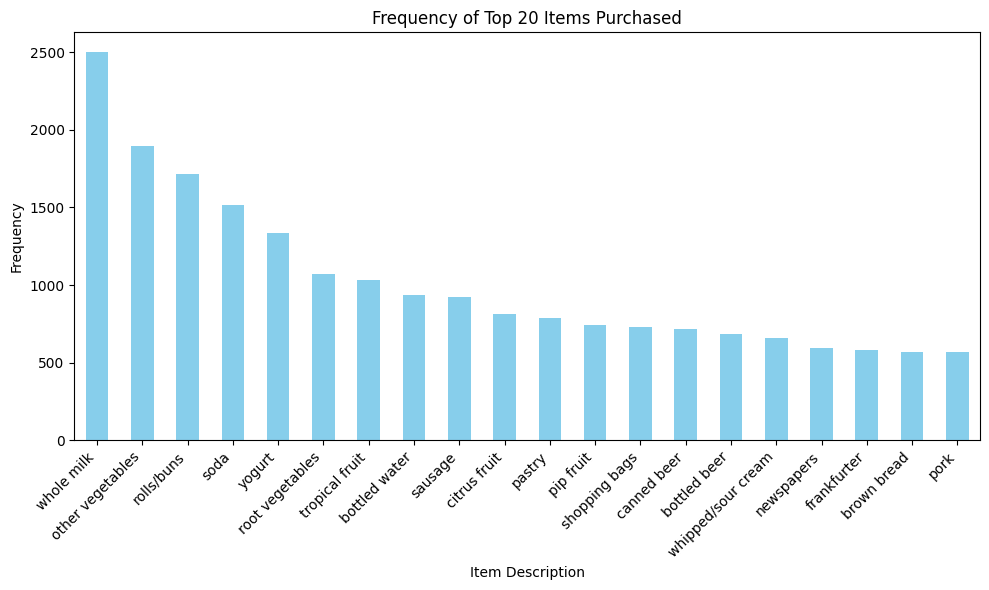

In [ ]:
# Examine the DataFrame's shape
print(f"DataFrame shape: {df_groceries.shape}")

# Inspect column names and data types
print("\nDataFrame info:")
df_groceries.info()

# Check for missing values
print("\nMissing values per column:")
print(df_groceries.isnull().sum())

# Explore unique items
print(f"\nNumber of unique items: {df_groceries['itemDescription'].nunique()}")

# Summarize basic statistics
print("\nSummary statistics for 'Date' and 'Member_number':")
print(df_groceries.describe(include='all')) # Include all columns for comprehensive summary statistics
# The describe() method will include the 'Date' column
# We are including all columns so the numeric column is shown properly

# Preliminary data visualization (optional but recommended)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_groceries['itemDescription'].value_counts().head(20).plot(kind='bar', color='skyblue') #visualize top 20
plt.title('Frequency of Top 20 Items Purchased')
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Transform the data to represent each transaction as a list of items.


**Reasoning**:
Group the data by 'Member_number' and 'Date', then aggregate the 'itemDescription' into lists within each group.

(Varor som köps har kodats med varje kunds/medlems nummer ovh vilket datum varan har köpts. Varor sorteras nu per kund och livsmedelsgrupp.)



In [ ]:
# Group the DataFrame by 'Member_number' and 'Date'
transactions = df_groceries.groupby(['Member_number', 'Date'])['itemDescription'].agg(list).reset_index()
transactions = transactions.rename(columns={'itemDescription': 'items'})
display(transactions.head())

,Member_number,Date,items
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


## Data analysis

### Subtask:
Analyze the frequency of individual items purchased and identify the most popular items.  Also, analyze the frequency of item pairs and identify the most frequently purchased pairs of items.


**Reasoning**:
Analyze the frequency of individual items and item pairs, then store the results in suitable data structures.

(Här beräknas antal individuella varor samt par av varor och de sparas i lämpliga datastrukturer. Ser du hur de sparas?)



In [ ]:
from collections import Counter
from itertools import combinations

# 1. Individual Item Frequency
individual_item_counts = Counter()
for transaction in transactions['items']:
    individual_item_counts.update(transaction)

top_10_items = individual_item_counts.most_common(10)
print("Top 10 most frequent items:")
for item, count in top_10_items:
    print(f"{item}: {count}")

# 2. Item Pair Frequency
item_pair_counts = Counter()
for transaction in transactions['items']:
    for pair in combinations(transaction, 2):
        item_pair_counts[tuple(sorted(pair))] += 1  # Sort for consistent counting

top_10_item_pairs = item_pair_counts.most_common(10)
print("\nTop 10 most frequent item pairs:")
for pair, count in top_10_item_pairs:
    print(f"{pair}: {count}")

Top 10 most frequent items:
whole milk: 2502
other vegetables: 1898
rolls/buns: 1716
soda: 1514
yogurt: 1334
root vegetables: 1071
tropical fruit: 1032
bottled water: 933
sausage: 924
citrus fruit: 812

Top 10 most frequent item pairs:
('other vegetables', 'whole milk'): 243
('rolls/buns', 'whole milk'): 227
('soda', 'whole milk'): 199
('whole milk', 'yogurt'): 183
('other vegetables', 'rolls/buns'): 182
('other vegetables', 'soda'): 160
('whole milk', 'whole milk'): 148
('sausage', 'whole milk'): 147
('tropical fruit', 'whole milk'): 136
('other vegetables', 'yogurt'): 131


## Data visualization

### Subtask:
Visualize the top 10 most frequent individual items and the top 10 most frequent item pairs.


**Reasoning**:
Visualize the top 10 most frequent individual items and item pairs using bar charts. Save the plots as PNG files.

(Visualisering av de 10 vanligaste varorna samt vanligaste paren via stapeldiagram. Diagrammen sparas som .png-filer.)



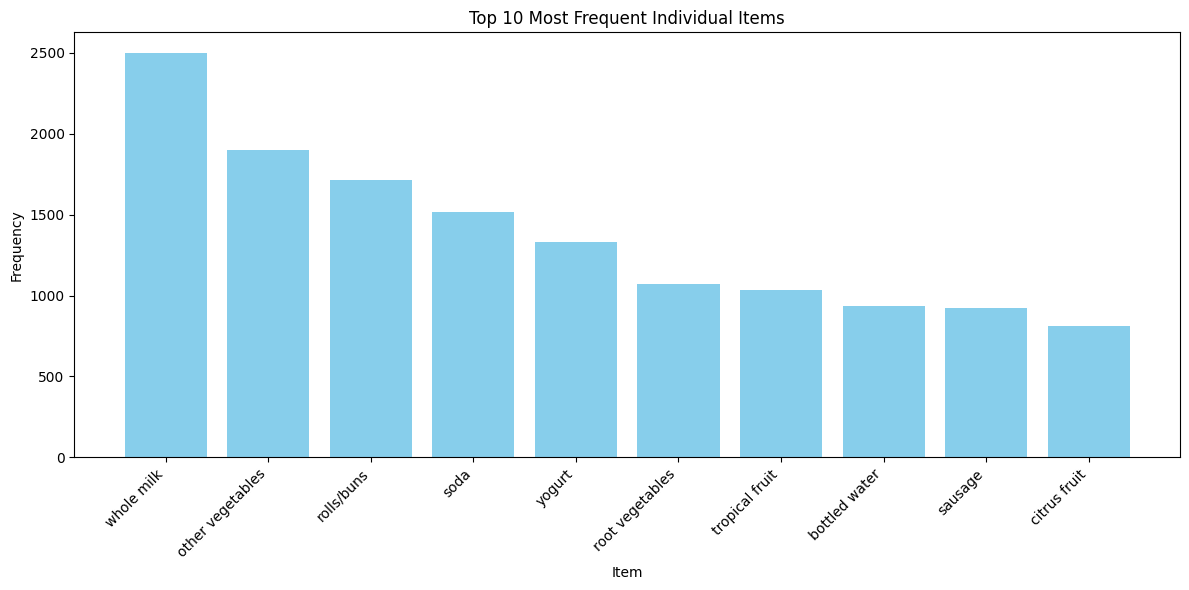

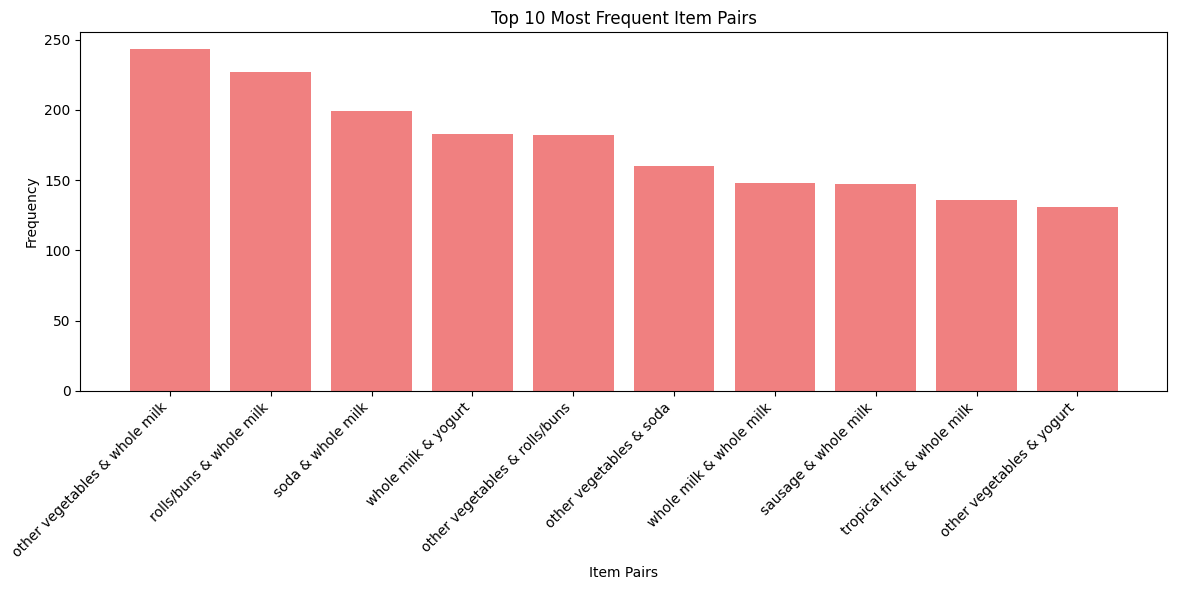

In [ ]:
import matplotlib.pyplot as plt

# 1. Visualize Top 10 Individual Items
plt.figure(figsize=(12, 6))
items, counts = zip(*top_10_items)
plt.bar(items, counts, color='skyblue')
plt.title('Top 10 Most Frequent Individual Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_items.png')
plt.show()


# 2. Visualize Top 10 Item Pairs
plt.figure(figsize=(12, 6))
pairs, pair_counts = zip(*top_10_item_pairs)
pair_labels = [f"{pair[0]} & {pair[1]}" for pair in pairs]  # Format labels for clarity
plt.bar(pair_labels, pair_counts, color='lightcoral')
plt.title('Top 10 Most Frequent Item Pairs')
plt.xlabel('Item Pairs')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_item_pairs.png')
plt.show()

## Summary:

### 1. Q&A

* **What are the most popular individual items?**  "whole milk", "other vegetables", "rolls/buns", "soda", "yogurt", "root vegetables", "tropical fruit", "bottled water", "sausage", and "citrus fruit" are the top 10 most frequent items.
* **What are the most frequently purchased pairs of items?**  The top 10 most frequent pairs include combinations like ('other vegetables', 'whole milk'), ('rolls/buns', 'whole milk'), ('soda', 'whole milk'), etc.  The full list is provided in the solution details.


### 2. Data Analysis Key Findings

* **No Missing Data:** The dataset contains no missing values across all columns ('Member_number', 'Date', 'itemDescription').
* **167 Unique Items:**  There are 167 unique items purchased, with "whole milk" being the most frequent.
* **Top 10 Items:**  The top 10 most frequent items are whole milk, other vegetables, rolls/buns, soda, yogurt, root vegetables, tropical fruit, bottled water, sausage, and citrus fruit.
* **Top Item Pairs:** The most frequent item pairs include combinations of whole milk with other vegetables, rolls/buns, soda, and yogurt, as well as other frequently paired items.  The full list of the top 10 pairs is provided in the solution details.
* **Data spans approximately two years:** The 'Date' column contains 728 unique dates, suggesting a period of approximately two years.


### 3. Insights or Next Steps

* **Market Basket Analysis:** Apply a more formal market basket analysis technique (e.g., Apriori algorithm) to identify stronger associations between items and generate more actionable insights.  This could uncover less obvious but significant relationships beyond simple frequency counts.
* **Customer Segmentation:** Segment customers based on their purchasing behavior (e.g., frequent buyers of specific product categories) to tailor promotions and recommendations.  Combine purchase patterns with other customer demographics (if available) for more granular segmentation.


#Som nästa steg, försök köra en analys med "Apriori-algrotimen". Hur kan man då göra?

Be Gemini att skapa fler programrader och se vad som kan hittas i datasetet.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Read data from Groceries_dataset.csv
df_groceries = pd.read_csv('/content/Groceries_dataset.csv')

# Create a list of lists representation of transactions directly from the CSV
transactions_list = []
for member_number, group in df_groceries.groupby('Member_number'):
    for date, items in group.groupby('Date')['itemDescription']:
        transactions_list.append(items.tolist())

# Print the first few transactions to check their format
print("First 5 transactions:", transactions_list[:5])

# Create a TransactionEncoder object
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)

# Create a one-hot encoded DataFrame using te.columns_ for columns
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Print the shape of the one-hot encoded DataFrame
print("Shape of one-hot encoded DataFrame:", one_hot_df.shape)

# Find frequent itemsets with a lower minimum support (e.g., 0.001 or even lower)
frequent_itemsets = apriori(one_hot_df, min_support=0.001, use_colnames=True)

# Print the number of frequent itemsets found
print("Number of frequent itemsets:", len(frequent_itemsets))

# Generate association rules with a lower minimum confidence (e.g., 0.3 or 0.2)
#rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)  # Using lift metric

# Print the number of association rules generated
print("Number of association rules:", len(rules))

# Display the association rules
display(rules)

First 5 transactions: [['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables']]
Shape of one-hot encoded DataFrame: (14963, 167)
Number of frequent itemsets: 750
Number of association rules: 88


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,0.000260,1.008012
1,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,0.000260,1.007196
2,(frozen vegetables),(beef),0.028002,0.033950,0.001270,0.045346,1.335656,0.000319,1.011937
3,(beef),(frozen vegetables),0.033950,0.028002,0.001270,0.037402,1.335656,0.000319,1.009764
4,(beef),(margarine),0.033950,0.032213,0.001403,0.041339,1.283297,0.000310,1.009519
...,...,...,...,...,...,...,...,...,...
83,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
84,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
85,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
86,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596


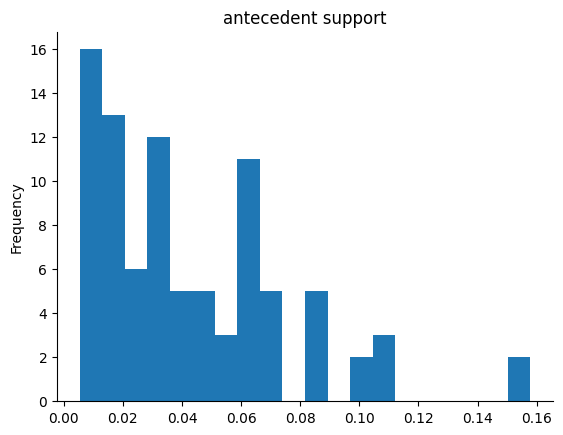

In [ ]:
# @title antecedent support

from matplotlib import pyplot as plt
rules['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)